# **CS224W - Colab 0**

运行示例代码，熟悉图挖掘和图神经网络的基本概念。

[NetworkX](https://networkx.org/documentation/stable/)
[PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

Pytorch 不需要了解全部细节。图神经网络的概念和实现在未来的讲座和Colab中介绍。


# NetworkX 教程

是创建，管理和挖掘图的工具。
主要内容是从这里过来 https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## 设置

In [1]:
import networkx as nx

## 图
NetworkX提供了多种图，有向图，无向图，也提供了一些类来构建多图。更多信息见。[NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [2]:
# 创建一个无向图
G = nx.Graph()
G.is_directed()

False

In [3]:
# 创建一个有向图
G = nx.DiGraph()
G.is_directed()

True

In [4]:
G.graph["Name"] = "Bar"
G.graph

{'Name': 'Bar'}

## 节点

节点的修改

In [5]:
# 添加节点属性
G.add_node(0, feature=5, label =0)
# 获取节点0的属性
node_0_attr = G.nodes[0]
f"Node 0 has the attributes {node_0_attr}"

"Node 0 has the attributes {'feature': 5, 'label': 0}"

In [6]:
# 添加多个属性节点
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) 
# 格式是 （节点， 属性字典）

for node in G.nodes(data=True):
  print(node)


(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})


In [7]:
# 获得节点个数
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

G has 3 nodes


## 边

便也可以高效管理

In [8]:
# 添加一个边权重0.5
G.add_edge(0, 1, weight=0.5)

edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [9]:
# 添加多个带属性的边
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# data=True可以看属性
for edge in G.edges():
  print(edge)


(0, 1)
(1, 2)
(2, 0)


In [10]:
# 观察边的个数
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

G has 3 edges


## 可视化

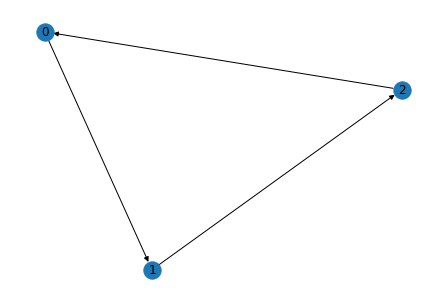

In [11]:
nx.draw(G, with_labels=True)

## 节点的度和邻居

In [12]:
node_id = 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))


Node 1 has degree 2


In [13]:
# 邻居信息
[neighbor for neighbor in G.neighbors(1)]

[2]

## 其他功能

NetworkX 提供了很多工具.

示例 [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) 

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

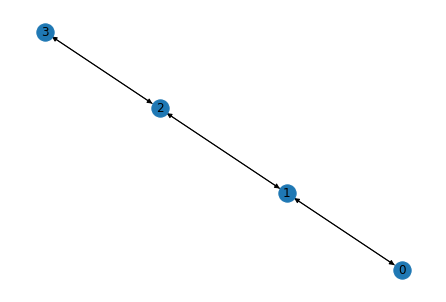

In [14]:
num_nodes = 4
# 创建一个网络，并改为有向图
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# 进行pagerank
pr = nx.pagerank(G, alpha=0.8)
pr

## 文档

# PyTorch Geometric 教程

PyTorch Geometric (PyG) 是PyTorch的扩展库. 它为开发图深度学习模型提供了有用的原始工具，包括各种图神经网络层和大量基准数据集。

不用担心 `GCNConv` -- 接下来慢慢来。

本教程参考了 https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI by [Matthias Fey](https://rusty1s.github.io/#/)

In [15]:
import torch
torch.__version__

'1.10.0+cu113'

## 安装依赖

安装教程 [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html). 

_注意安装很耗时间_

## 可视化

In [16]:
# 可视化工具
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# 可视化函数
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    # h 是网络参数，与之匹配的还有epoch, loss ,accuracy 这些网络的参数
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        # 使用网络参数
        h = h.detach().cpu().numpy()
        # 选择两个维度进行展示
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)

    else:
        # 直接绘制图
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## 引言

最近，图深度学习已成为深度学习社区中最热门的研究领域之一。
在这里，**图神经网络 (GNN)** 旨在将经典深度学习概念推广到不规则结构化数据（与图像或文本相反），并使神经网络能够推理对象及其关系。

本教程将通过基于 **[PyTorch Geometric (PyG) 库](https://github.com/rusty1s/pytorch_geometric)** 的图神经网络向您介绍有关图深度学习的一些基本概念。
PyTorch Geometric 是流行的深度学习框架 [PyTorch](https://pytorch.org/) 的扩展库，由各种方法和实用程序组成，以简化图神经网络的实现。

继 [Kipf 等人。 (2017)](https://arxiv.org/abs/1609.02907)，让我们通过一个简单的图结构示例，著名的 [**Zachary 的空手道俱乐部网络**]( https://en.wikipedia.org/wiki/Zachary%27s_karate_club）。该图描述了一个空手道俱乐部 34 名成员的社交网络，并记录了在俱乐部外互动的成员之间的联系。在这里，我们感兴趣的是检测从成员的互动中产生的社区。

## 数据集

PyTorch Geometric 通过 [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) 子包提供对数据集的轻松访问：

In [17]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


在初始化 [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) 数据集后，我们首先可以检查它的一些属性。
例如，我们可以看到这个数据集恰好包含**一个图**，并且这个数据集中的每个节点都被分配了一个**34维特征向量**（它唯一地描述了空手道俱乐部的成员）。
此外，该图恰好包含 **4 个类**，代表每个节点所属的社区。

现在让我们更详细地看一下：

## 数据与边索引

PyTorch Geometric 中的每个图形都由一个 [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) 对象表示，该对象包含所有信息来描述其图形表示。
我们可以随时通过 `print(data)` 打印数据对象，以接收有关其属性及其形状的简短摘要：
``
数据(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
``
我们可以看到这个 `data` 对象拥有 4 个属性：

- `edge_index` 属性包含有关 **graph 连接**的信息，每个边的源节点和目标节点索引的元组。
- **节点特征** 称为 `x`（34 个节点中的每一个都分配了一个 34 维特征向量），并将
- **节点标签** 称为 `y`（每个节点只分配给一个类）。
- `train_mask` 的附加属性，它描述了我们已经知道哪些节点的社区分配（为了划分训练和验证集合）。
总的来说，我们只知道 4 个节点的真实标签（每个社区一个），任务是推断其余节点的社区分配。

`data` 对象还提供了一些**实用函数**来推断底层图的一些基本属性。
例如，我们可以很容易地推断出图中是否存在孤立节点（*ie*不存在任何节点的边），图中是否包含自环（*ie*, $(v, v) \in \mathcal {E}$)，或者图是否是无向图（*ie*，对于每条边 $(v, w) \in \mathcal{E}$ 也存在边 $(w, v) \in \mathcal{ E}$)。

In [18]:
# 数据集是列表形式,从列表中取出第一个数据
data = dataset[0]  

print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [19]:
# 图的统计特征
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2*data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 34
Number of edges: 156
Average node degree: 9.18
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [20]:
# 边索引信息
data.edge_index.shape

torch.Size([2, 156])

打印 `edge_index`，我们可以进一步了解 PyG 如何在内部表示图连通性。
我们可以看到，对于每条边，`edge_index` 包含两个节点索引的元组，其中第一个值描述源节点的节点索引，第二个值描述边的目标节点的节点索引。

这种表示被称为 **COO 格式（坐标格式）**，通常用于表示稀疏矩阵。
而不是在密集表示中保存邻接信息 $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$，PyG 表示稀疏图，指只保存 $\mathbf{A}$ 中条目不为零的坐标/值。

我们可以通过将其转换为 `networkx` 库格式来进一步可视化图形，除了图形操作功能之外，它还实现了强大的可视化工具：

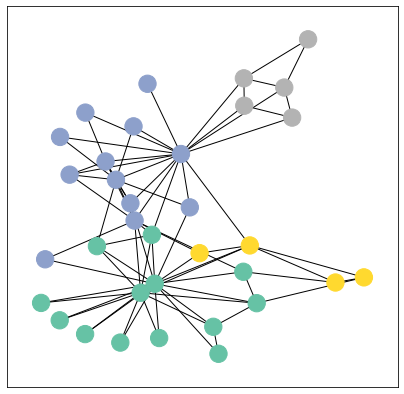

In [21]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## 实现图神经网络 (GNNs)

实现自己的图神经网络

使用最基础的 **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG 中是 [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), 可以接收节点特征`x`和图的连通性坐标式表征`edge_index`.

### GNN的输出是什么?

GNN 的目标是获取输入图 $G = (\mathcal{V}, \mathcal{E})$ 其中每个节点 $v_i \in \mathcal{V}$ 都有一个输入特征向量 $X_i^{ (0)}$。我们要学习的是一个函数 $f \to \mathcal{V} \times \mathcal{R}^d$，这个函数接受一个节点及其特征向量，以及图结构，并输出一个_embedding_，一个向量，以对我们的下游任务有用的方式表示该节点。一旦我们将节点及其初始特征映射到他们学习的嵌入，我们就可以使用这些嵌入来执行各种不同的任务，包括节点级、边缘级或图级回归/分类。

我们来学习能够分类每个节点的社区的嵌入表征.

使用 `torch.nn.Module` 来构建网络结构:

In [25]:
import torch
from torch.nn import  Linear
from torch_geometric.nn import  GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16,4)
        self.conv3 = GCNConv(4,2)
        self.classifier = Linear(2, dataset.num_classes)
    
    def forward(self,x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        out = self.classifier(h)

        return out,h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 16)
  (conv2): GCNConv(16, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


在这里，我们首先在 `__init__` 中初始化我们的所有构建块，并在 `forward` 中定义我们网络的计算流程。
我们首先定义并堆叠**三个图卷积层**。每层对应于聚合来自每个节点的 1 跳邻域（其直接邻居）的信息，但是当我们将这些层组合在一起时，我们能够聚合来自每个节点的 3 跳邻域（最多 3 个“跳”的所有节点）的信息）。

此外，`GCNonv` 层将节点特征维度降低到 $2$，*即*，$34 \rightarrow 16 \rightarrow 4 \rightarrow 2$。每个 `GCNConv` 层都由 [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) 非线性增强。

之后，我们应用单个线性变换 ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.线性））作为分类器将我们的节点映射到 4 个类/社区中的 1 个。

我们返回最终分类器的输出以及 GNN 生成的最终节点嵌入。
我们继续通过 GCN() 初始化我们的最终模型，打印我们的模型会生成所有使用的子模块的摘要。

Embedding shape: [34, 2]


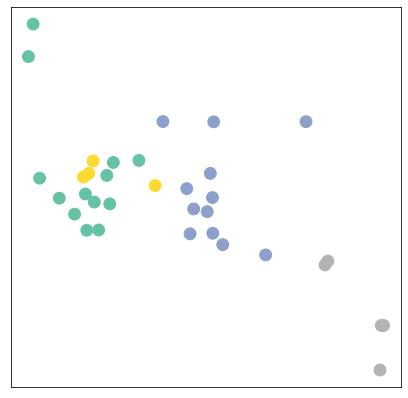

In [26]:
_, h = model(data.x, data.edge_index)
print(f"Embedding shape: {list(h.shape)}")

visualize(h, color=data.y)

值得注意的是，即使在训练我们模型的权重之前，该模型也会生成与图的社区结构非常相似的节点嵌入。
相同颜色的节点（社区）已经在嵌入空间中紧密聚集在一起，尽管我们模型的权重是**完全随机**初始化的，到目前为止我们还没有进行任何训练！
这得出的结论是 GNN 引入了强烈的归纳偏差，导致输入图中彼此靠近的节点具有相似的嵌入。

### Karate club 网络的训练

但我们能做得更好吗？让我们看一个示例，说明如何根据图中 4 个节点的社区分配知识（每个社区一个）来训练我们的网络参数：

由于我们模型中的所有内容都是可微分和参数化的，我们可以添加一些标签、训练模型并观察嵌入的反应。
在这里，我们使用半监督或转导学习程序：我们只是针对每个类的一个节点进行训练，但允许使用完整的输入图数据。

训练我们的模型与任何其他 PyTorch 模型非常相似。
除了定义我们的网络架构之外，我们还定义了一个损失标准（这里是 [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)）并初始化一个随机梯度优化器（这里是 [`Adam`]（https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam））。
之后，我们执行多轮优化，其中每一轮包括向前和向后传递，以计算模型参数 w.r.t. 的梯度。到前向传球产生的损失。
如果您不熟悉 PyTorch，那么您应该对这个方案很熟悉。
否则，PyTorch 文档提供了[关于如何在 PyTorch 中训练神经网络的良好介绍](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer ）。

请注意，我们的半监督学习场景是通过以下行实现的：

```
loss = criterion（out [data.train_mask]，data.y[data.train_mask]）
```

虽然我们为所有节点计算节点嵌入，但我们**仅使用训练节点来计算损失**。
在这里，这是通过过滤分类器“out”和真实标签“data.y”的输出以仅包含“train_mask”中的节点来实现的。

现在让我们开始训练，看看我们的节点嵌入如何随时间演变（最好通过显式运行代码体验）：

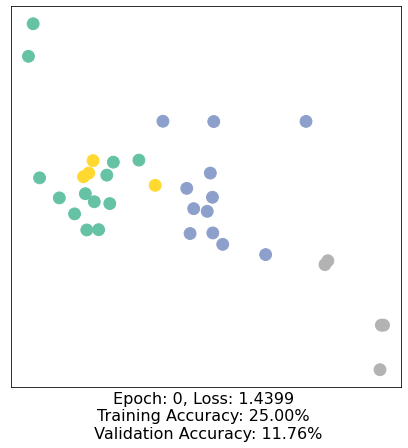

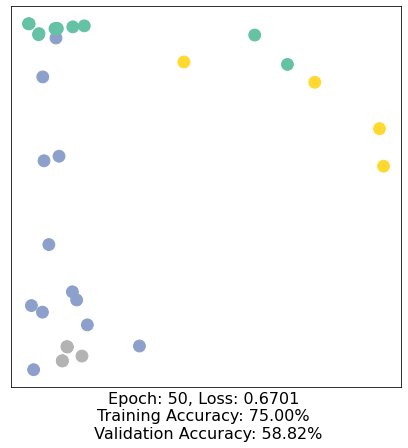

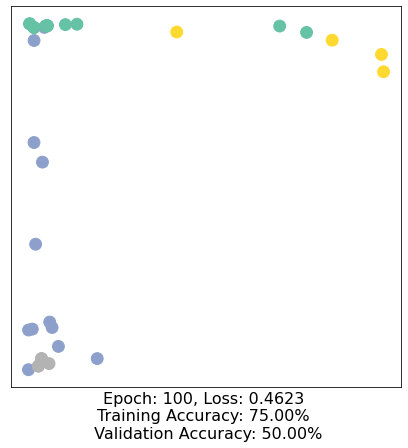

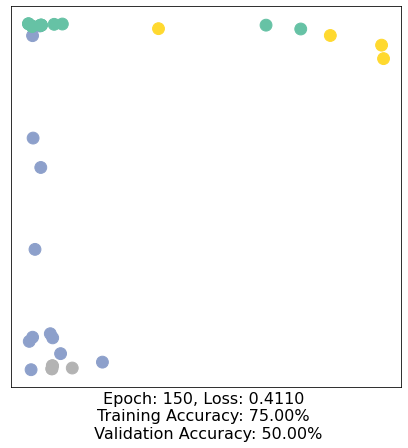

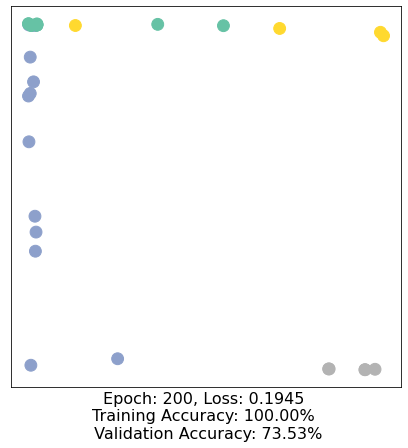

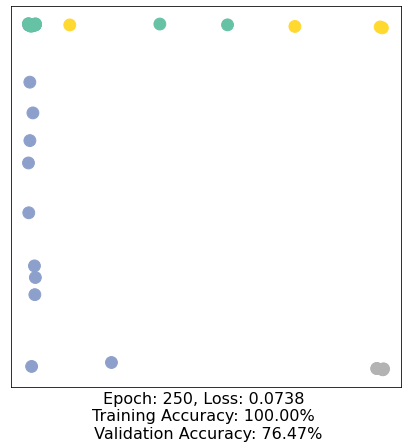

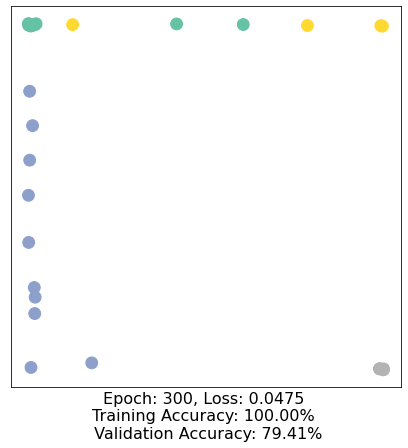

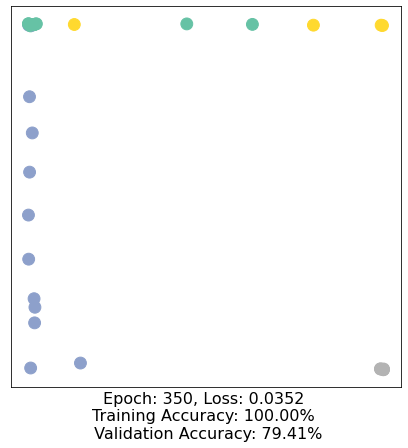

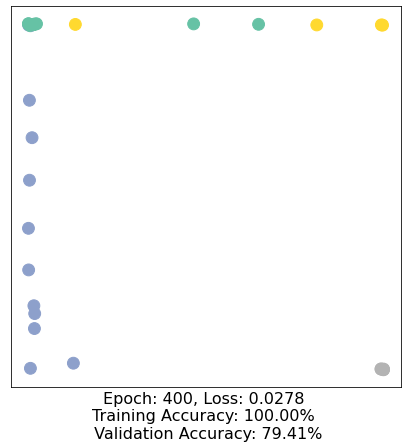

In [29]:
import time
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

def train(data):
    optimizer.zero_grad() # 清除梯度
    out,h = model(data.x, data.edge_index) 
    loss = criterion(out[data.train_mask],data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    acc = {}
    pred = torch.argmax(out[data.train_mask],axis=1)
    target = data.y[data.train_mask]
    acc['train'] = torch.mean(torch.where(pred == target, 1, 0).float())
    pred = torch.argmax(out, axis=1)
    target = data.y
    acc['val'] = torch.mean(torch.where(pred == target, 1, 0).float())
    return loss, h, acc

for epoch in range(401):
    loss, h, acc = train(data)
    # 可视化嵌入结果
    if epoch % 50 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=acc)
        time.sleep(0.3)

如您所见，我们的 3 层 GCN 模型设法很好地分离了社区，并对大多数节点进行了正确分类。

此外，我们用几行代码完成了这一切，这要归功于 PyTorch Geometric 库，它帮助我们完成了数据处理和 GNN 实现。

## 相关文档
PyG 更多见 [文档](https://pytorch-geometric.readthedocs.io/en/latest/).